   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       1  
1   0     3       0  
2   0     3       2  
3   1     3       2  
4   3     2       2  


D:\Study\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Study\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


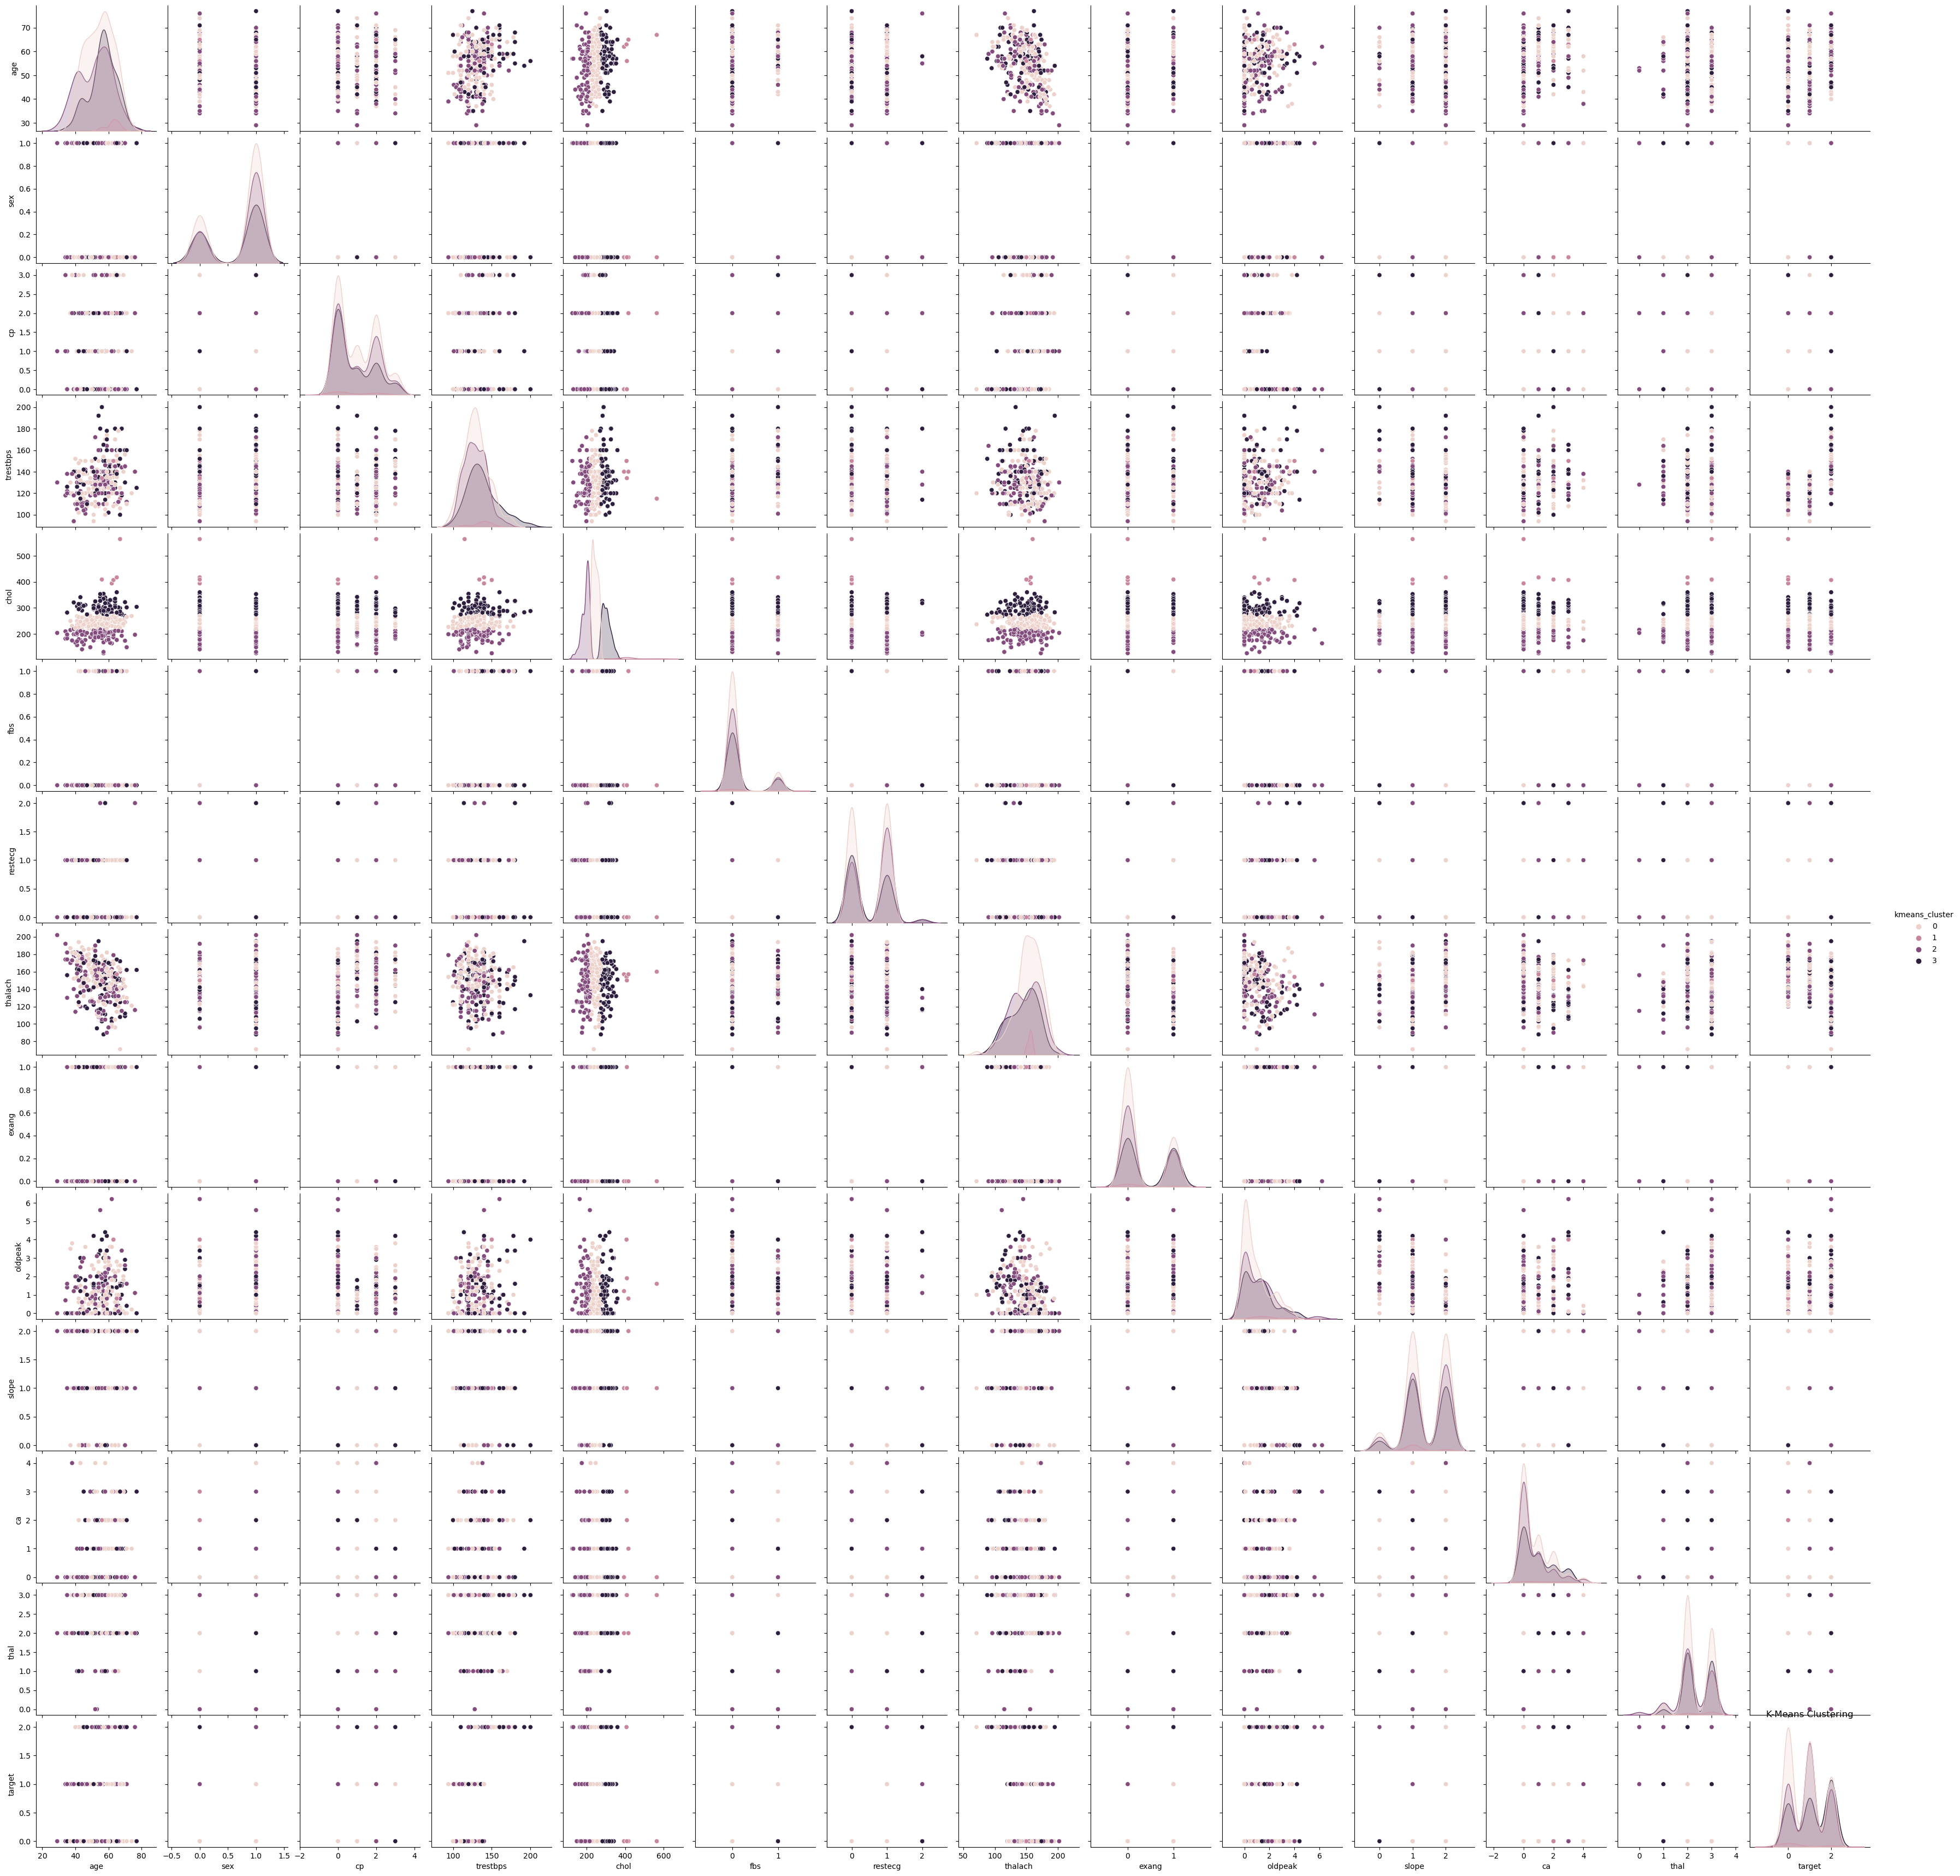

Confusion Matrix:
[[53  4  3]
 [ 0 78  5]
 [ 6  8 48]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        60
           1       0.87      0.94      0.90        83
           2       0.86      0.77      0.81        62

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



D:\Study\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv("C:\\Users\\ladan\\Downloads\\heart1 (1).csv")


# Display the first few rows of the dataset
print(data.head())

# Extract features (X) and target variable (y)
X = data.drop('target', axis=1)
y = data['target']

# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
data['kmeans_cluster'] = kmeans.labels_

# Visualize clusters using pairplot
sns.pairplot(data=data, hue='kmeans_cluster')
plt.title('K-Means Clustering')
plt.show()

# Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluation
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load dataset
data = pd.read_csv("C:\\Users\\ladan\\Downloads\\heart1 (1).csv")


# Perform preprocessing (e.g., handle missing values, encode categorical variables)
# Assuming 'target' is the target variable and other columns are features

# Select relevant features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features with feature names
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y=y_train)  # Providing y_train for feature names
X_test_scaled = scaler.transform(X_test)

# Choose algorithm (Random Forest Classifier in this example)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# Make predictions for new data
new_patient_data = [[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]]  # Fill in the data for the new patient
new_patient_data_scaled = scaler.transform(new_patient_data)
predicted_disease_type = model.predict(new_patient_data_scaled)
print('Predicted Disease Type:', predicted_disease_type)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        83
           2       1.00      1.00      1.00        62

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Predicted Disease Type: [2]


D:\Study\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load dataset
data = pd.read_csv("C:\\Users\\ladan\\Downloads\\heart1 (1).csv")

# Perform preprocessing (e.g., handle missing values, encode categorical variables)
# Assuming 'target' is the target variable and other columns are features

# Select relevant features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features with feature names
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y=y_train)  # Providing y_train for feature names
X_test_scaled = scaler.transform(X_test)

# Choose algorithm (Random Forest Classifier in this example)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# Take input for new patient data
new_patient_data = []
for column in X.columns:
    value = input(f"Enter value for {column}: ")
    new_patient_data.append(float(value))  # Assuming input values are numeric

# Make predictions for new data
new_patient_data_scaled = scaler.transform([new_patient_data])
predicted_disease_type = model.predict(new_patient_data_scaled)
print('Predicted Disease Type:', predicted_disease_type)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        83
           2       1.00      1.00      1.00        62

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Enter value for age: 63
Enter value for sex: 1
Enter value for cp: 3
Enter value for trestbps: 145
Enter value for chol: 233
Enter value for fbs: 1
Enter value for restecg: 0
Enter value for thalach: 150
Enter value for exang: 0
Enter value for oldpeak: 2.3
Enter value for slope: 0
Enter value for ca: 0
Enter value for thal: 1
Predicted Disease Type: [2]


D:\Study\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load dataset
data = pd.read_csv("C:\\Users\\ladan\\Downloads\\heart1 (1).csv")

# Perform preprocessing (e.g., handle missing values, encode categorical variables)
# Assuming 'target' is the target variable and other columns are features

# Select relevant features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features with feature names
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y=y_train)  # Providing y_train for feature names
X_test_scaled = scaler.transform(X_test)

# Choose algorithm (K-Nearest Neighbors Classifier in this example)
model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
model.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# Take input for new patient data
new_patient_data = []
for column in X.columns:
    value = input(f"Enter value for {column}: ")
    new_patient_data.append(float(value))  # Assuming input values are numeric

# Make predictions for new data
new_patient_data_scaled = scaler.transform([new_patient_data])
predicted_disease_type = model.predict(new_patient_data_scaled)
print('Predicted Disease Type:', predicted_disease_type)


              precision    recall  f1-score   support

           0       0.83      0.98      0.90        60
           1       0.89      0.89      0.89        83
           2       0.82      0.68      0.74        62

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205

Enter value for age: 63
Enter value for sex: 1
Enter value for cp: 3
Enter value for trestbps: 145
Enter value for chol: 233
Enter value for fbs: 1
Enter value for restecg: 0
Enter value for thalach: 150
Enter value for exang: 0
Enter value for oldpeak: 2.3
Enter value for slope: 0
Enter value for ca: 0
Enter value for thal: 1
Predicted Disease Type: [2]


D:\Study\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load dataset
data = pd.read_csv("C:\\Users\\ladan\\Downloads\\heart1 (1).csv")

# Perform preprocessing (e.g., handle missing values, encode categorical variables)
# Assuming 'target' is the target variable and other columns are features

# Select relevant features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features with feature names
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y=y_train)  # Providing y_train for feature names
X_test_scaled = scaler.transform(X_test)

# Choose algorithm (Support Vector Machine Classifier in this example)
model = SVC(kernel='linear', random_state=42)  # Using linear kernel, you can try other kernels as well
model.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# Take input for new patient data
new_patient_data = []
for column in X.columns:
    value = input(f"Enter value for {column}: ")
    new_patient_data.append(float(value))  # Assuming input values are numeric

# Make predictions for new data
new_patient_data_scaled = scaler.transform([new_patient_data])
predicted_disease_type = model.predict(new_patient_data_scaled)
print('Predicted Disease Type:', predicted_disease_type)


              precision    recall  f1-score   support

           0       0.93      0.95      0.94        60
           1       0.94      0.96      0.95        83
           2       0.92      0.87      0.89        62

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205

